### 使用 cifar-10 数据集完成分类任务，可以 10 分类也可以 2 分类，自己把握

In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import _pickle as pickle
import seaborn
import numpy as np
import os
import pickle

ERROR! Session/line number was not unique in database. History logging moved to new session 329


In [46]:
def unpickle(filename):
    '''解压数据'''
    # Python2
    # with open(filename) as f:
    #     d = pickle.load(f)
    #     return d
    
    # Python3
    with open(filename, 'rb') as f:
        d = pickle.load(f, encoding='latin1')
        return d


def onehot(labels):
    '''one-hot 编码'''
    n_sample = len(labels)
    n_class = max(labels) + 1
    onehot_labels = np.zeros((n_sample, n_class))
    onehot_labels[np.arange(n_sample), labels] = 1
    return onehot_labels

In [47]:
data1 = unpickle('data/data_batch_1')
data2 = unpickle('data/data_batch_2')
data3 = unpickle('data/data_batch_3')
data4 = unpickle('data/data_batch_4')
data5 = unpickle('data/data_batch_5')
X_train = np.concatenate((data1['data'], data2['data'], data3['data'], data4['data'], data5['data']), axis=0)
y_train = np.concatenate((data1['labels'], data2['labels'], data3['labels'], data4['labels'], data5['labels']), axis=0)
y_train = onehot(y_train)
# 测试数据集
test = unpickle('data/test_batch')
X_test = test['data'][:5000, :]
y_test = onehot(test['labels'])[:5000, :]

In [48]:
print('Training dataset shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Testing dataset shape:', X_test.shape)
print('Testing labels shape:', y_test.shape)

Training dataset shape: (50000, 3072)
Training labels shape: (50000, 10)
Testing dataset shape: (5000, 3072)
Testing labels shape: (5000, 10)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-df2b0f3258bd>", line 2, in <module>
    sns.countplot(y_train.ravel(), ax=ax[0], palette = ['#7DB0BB'])
NameError: name 'sns' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of

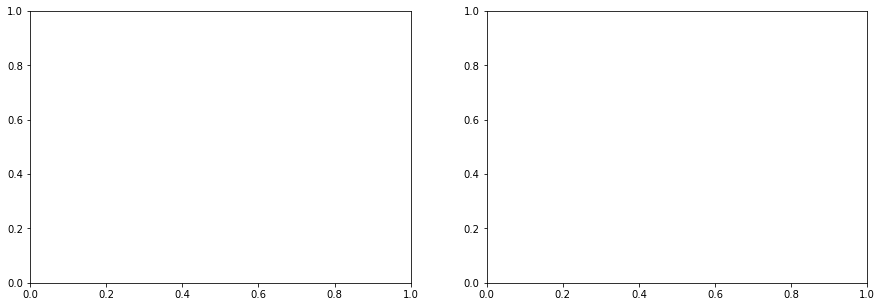

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(y_train.ravel(), ax=ax[0], palette = ['#7DB0BB'])
sns.countplot(y_test.ravel(), ax=ax[1], palette = ['#AE95C1'])
ax[0].set_title('Count of Train set labels')
ax[1].set_title('Count of Test set labels')
plt.show()

In [32]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 330
Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-49-808017229d47>", line 7, in <module>
    show_img(X_train, y_train, 30)
  File "<ipython-input-49-808017229d47>", line 3, in show_img
    plt.imshow(X[index])
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\matplotlib\pyplot.py", line 2730, in imshow
    **kwargs)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\matplotlib\__init__.py", line 1447, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\matplotlib\axes\_axes.py", line 5523, in imshow
    im.set_data(X)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\matplotlib\image.

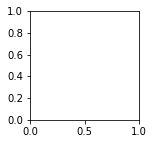

In [ ]:
def show_img(X, y, index):
    plt.figure(figsize=(2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

show_img(X_train, y_train, 30)

In [35]:
for i in range(1, 6):
    feats, lbls = load_batch('data', i)
    test_size = int(len(feats) * 0.1)
    
    # training data
    norm_feats = normalize(feats[:-test_size])
    one_hot_lbls = one_hot_encode(lbls[:-test_size])
    pickle.dump((norm_feats, one_hot_lbls), open('preprocess_batch_%i.p' % i, 'wb'))
    
    # add the rest to the test data
    test_feats.extend(feats[-test_size:])
    test_lbls.extend(lbls[-test_size:])

# dump the test data too
norm_test_feats = normalize(np.array(test_feats))
one_hot_test_lbls = one_hot_encode(np.array(test_lbls))
pickle.dump((norm_test_feats, one_hot_test_lbls), open('preprocess_test.p', 'wb'))


In [36]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # Weights
    W_shape = list(conv_ksize) + [int(x_tensor.shape[3]), conv_num_outputs]
    W = tf.Variable(tf.truncated_normal(W_shape, stddev=.05))
    
    # Apply convolution
    x = tf.nn.conv2d(
        x_tensor, W,
        strides = [1] + list(conv_strides) + [1],
        padding = 'SAME'
    )
    
    # Add bias
    b = tf.Variable(tf.zeros([conv_num_outputs]))
    x = tf.nn.bias_add(x, b)
    
    # Nonlinear activation (ReLU)
    x = tf.nn.relu(x)
    
    # Max pooling
    return tf.nn.max_pool(
        x,
        ksize = [1] + list(pool_ksize) + [1],
        strides = [1] + list(pool_strides) + [1],
        padding = 'SAME'
    )

In [37]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    return tf.reshape(x_tensor, [-1, np.prod(x_tensor.shape.as_list()[1:])])

In [38]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weights and bias
    W = tf.Variable(tf.truncated_normal([int(x_tensor.shape[1]), num_outputs], stddev=.05))
    b = tf.Variable(tf.zeros([num_outputs]))
    
    # The fully connected layer
    x = tf.add(tf.matmul(x_tensor, W), b)
    
    # ReLU activation function
    return tf.nn.relu(x)

In [39]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # Weights and bias
    W = tf.Variable(tf.truncated_normal([int(x_tensor.shape[1]), num_outputs], stddev=.05))
    b = tf.Variable(tf.zeros([num_outputs]))
    
    # The output layer
    return tf.add(tf.matmul(x_tensor, W), b)

In [40]:
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    # 3 convolution layers with max pooling
    # All layers with same kernel, stride and maxpooling params
    x = conv2d_maxpool(x, 64, (3,3), (1,1), (2,2), (2,2))
    x = conv2d_maxpool(x, 128, (3,3), (1,1), (2,2), (2,2))
    x = conv2d_maxpool(x, 256, (3,3), (1,1), (2,2), (2,2))
    
    # dropout after convolutions
    x = tf.nn.dropout(x, keep_prob)
    
    # flatten layer
    x = flatten(x)

    # 1 fully connected layer followed by dropout
    x = fully_conn(x, 1024)
    x = tf.nn.dropout(x, keep_prob)
    
    # output layer
    return output(x, 10)


In [41]:
# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = tf.placeholder(tf.float32, [None, 32, 32, 3], name="x")
y = tf.placeholder(tf.float32, [None, 10], name="y")
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')


In [42]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    global valid_features, valid_labels
    loss = sess.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_acc = sess.run(
        accuracy, 
        feed_dict={
            x: norm_test_feats,
            y: one_hot_test_lbls,
            keep_prob: 1.
        }
    )
    print('Loss: {:>8.4f}, Validation Accuracy: {:>8.6f}'.format(loss, valid_acc))

In [43]:
epochs = 80
batch_size = 1024
keep_probability = 0.5


In [44]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]


def load_preprocess_training_batch(batch_id, batch_size):
    """
    Load the Preprocessed Training data and return them in batches of <batch_size> or less
    """
    filename = 'preprocess_batch_' + str(batch_id) + '.p'
    features, labels = pickle.load(open(filename, mode='rb'))

    # Return the training data in batches of size <batch_size> or less
    return batch_features_labels(features, labels, batch_size)

In [ ]:
print("Training...")
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        n_batches = 5
        for batch_i in range(1, n_batches+1):
            for batch_features, batch_labels in load_preprocess_training_batch(batch_i, batch_size):
                sess.run(
                    optimizer, 
                    feed_dict={
                        x: batch_features, 
                        y: batch_labels, 
                        keep_prob: keep_probability
                    }
                )
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
    
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, './image_classification')

Training...
Epoch  1, CIFAR-10 Batch 1:  Loss:   2.1813, Validation Accuracy: 0.270000
Epoch  1, CIFAR-10 Batch 2:  Loss:   1.9550, Validation Accuracy: 0.330200
Epoch  1, CIFAR-10 Batch 3:  

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-c2820def8aa2>", line 20, in <module>
    print_stats(sess, batch_features, batch_labels, cost, accuracy)
  File "<ipython-input-42-009eadadfde8>", line 17, in print_stats
    keep_prob: 1.
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 956, in run
    run_metadata_ptr)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 1180, in _run
    feed_dict_tensor, options, run_metadata)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 1359, in _do_run
    run_metadata)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py"

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-45-c2820def8aa2>", line 20, in <module>
    print_stats(sess, batch_features, batch_labels, cost, accuracy)
  File "<ipython-input-42-009eadadfde8>", line 17, in print_stats
    keep_prob: 1.
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 956, in run
    run_metadata_ptr)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 1180, in _run
    feed_dict_tensor, options, run_metadata)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py", line 1359, in _do_run
    run_metadata)
  File "C:\Users\29459\anaconda3\envs\python37\lib\site-packages\tensorflow_core\python\client\session.py"